# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [33]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [34]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [35]:
print(len(X))
print(len(y))


150
150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [36]:
print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

(150, 4)
(150,)
float64
int64


**Question 3:** How many classes ? How many samples per class ?

In [48]:
# print distinct values of y
classes = np.unique(y)
print(f"Distinct values of y: {classes}")

classes_count = len(classes)
print(f"Number of distinct values of y: {classes_count}")

# count of each distinct value of y
print(f"Count of each distinct value of y: {np.bincount(y)}")

Distinct values of y: [0 1 2]
Number of distinct values of y: 3
Count of each distinct value of y: [50 50 50]


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

(150, 2)


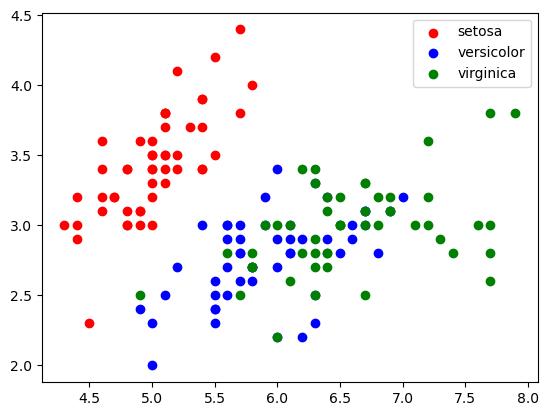

In [52]:
# X is (150, 4). Make it (150, 2) by taking only the first two features for plotting
X_plot = X[:, :2]
print(X_plot.shape)
# use different colors for each class
colors = ['red', 'blue', 'green']

classes_name = iris.target_names

# plot the data
for idx, cl in enumerate(np.unique(y)):
    class_vals = X_plot[y == cl]
    class_name = classes_name[cl]
    plt.scatter(class_vals[:, 0], class_vals[:, 1], c=colors[idx], label=class_name)

plt.legend()



**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

metrics for perfect prediction
accuracy 1.0
recall [1. 1. 1.]
f1 [1. 1. 1.]


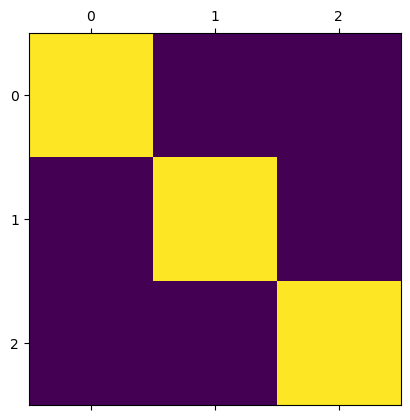

In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# here is an example for accuracy: 


def metrics(y, y_pred):
    acuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average=None)
    f1 = f1_score(y, y_pred, average=None)
    print("accuracy", acuracy)
    print("recall", recall)
    print("f1", f1)

    confusion = confusion_matrix(y, y_pred)
    plt.matshow(confusion)

print("metrics for perfect prediction")
metrics(y, y)

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

metrics for random classification
accuracy 0.3333333333333333
recall [0.4 0.3 0.3]
f1 [0.39215686 0.2970297  0.30927835]


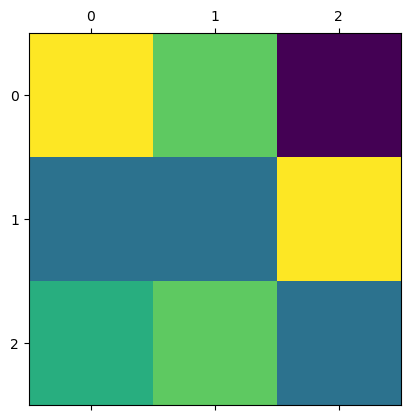

In [44]:
Y_rand = np.random.randint(0, classes_count, size=len(y))
print("metrics for random classification")
metrics(y, Y_rand)

### binary classification

In [45]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]


In [46]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

metrics for threshold classification
accuracy 0.975
recall [1.         0.95238095]
f1 [0.97435897 0.97560976]


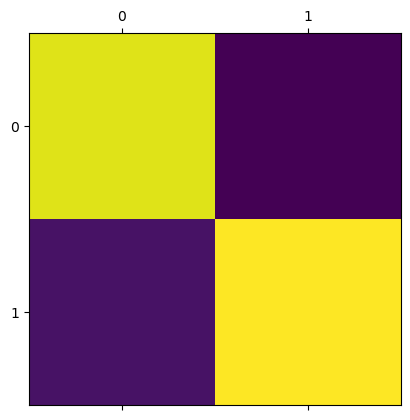

In [66]:
# according to the plot, we can see that the data is linearly separable with
# a line that goes through (4.5, 2.25) and (6, 3.5)
def line(x):
    return 0.833 * x - 1.5  # from https://planetcalc.com/8110/


# if the point is above the line, it is class 0, otherwise it is class 1
def threshold(x, y):
    return 0 if y > line(x) else 1

# predict
Y_threshold = np.array([threshold(x, y) for x, y in X_test[:, :2]])

# compute metrics
print("metrics for threshold classification")
metrics(y_test, Y_threshold)

**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

No, since there is no clear separation with the third class (at least according to the plot).

## dataset: digit

In [67]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

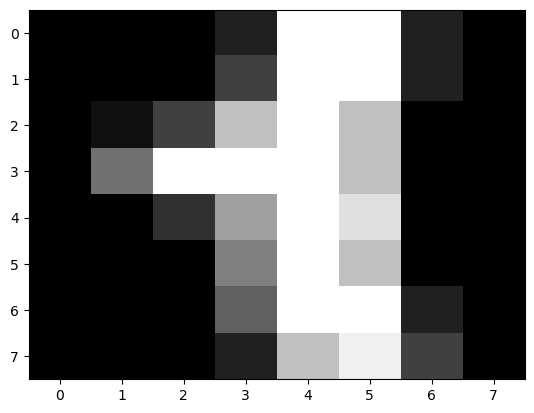

class =  1
[ 0.  0.  0.  2. 16. 16.  2.  0.  0.  0.  0.  4. 16. 16.  2.  0.  0.  1.
  4. 12. 16. 12.  0.  0.  0.  7. 16. 16. 16. 12.  0.  0.  0.  0.  3. 10.
 16. 14.  0.  0.  0.  0.  0.  8. 16. 12.  0.  0.  0.  0.  0.  6. 16. 16.
  2.  0.  0.  0.  0.  2. 12. 15.  4.  0.]


In [91]:
# display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
i = 21 # index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])
print(X[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

(1797, 64)
(1797,)
float64
int64


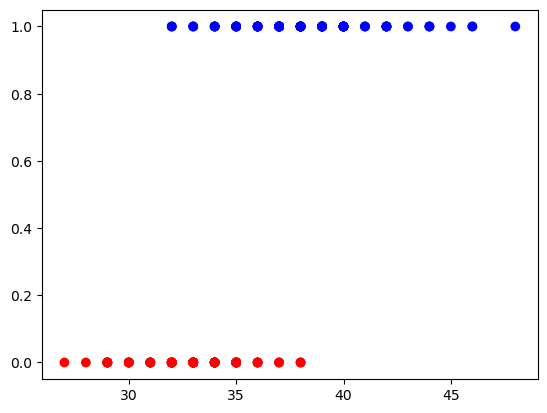

In [114]:
# Data shape
print(X.shape)
print(y.shape)

# Data type
print(X.dtype)
print(y.dtype)

# let's just skip to the classification part
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# Let's keep only two classes: 0 and 1
X_train = X_train[y_train<2]
y_train = y_train[y_train<2]
X_test = X_test[y_test<2]
y_test = y_test[y_test<2]

# Now we need a dimensionality reduction method
# An image is a 8x8 matrix, so we have 64 features
# The digit zero usually has more black pixels than the digit one
# So we can count the number of black pixels and use it as a feature
# Let's consider a black pixel is a pixel with a value less than 3

def count_black_pixels(x):
    return np.count_nonzero(x < 3)

# apply the function to all images
X_train_black = np.apply_along_axis(count_black_pixels, 1, X_train)

# plot the data, using red for class 0 and blue for class 1
plt.scatter(X_train_black, y_train, c=['red' if y == 0 else 'blue' for y in y_train])


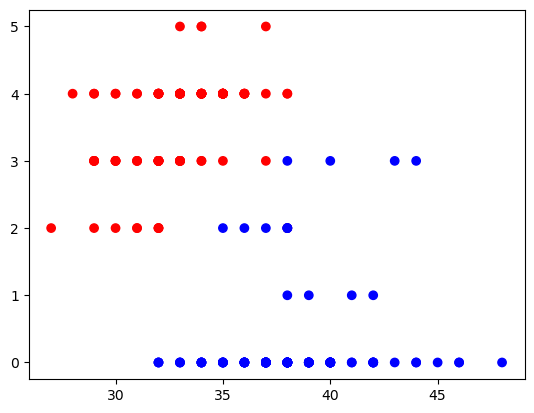

In [120]:
# there is no clear separation between the two classes
# so this is not good enough. We need another feature
# let's count the number of black pixels in the middle column (column 4)
def count_black_pixels_middle(x):
    middle = x.reshape((8, 8))[:, 4]
    return count_black_pixels(middle)


# apply the function to all images
X_train_middle_black = np.apply_along_axis(count_black_pixels_middle, 1,
                                           X_train)

# plot the data
plt.scatter(X_train_black, X_train_middle_black, c=['red' if y == 0 else 'blue' for y in y_train])

metrics for threshold classification
accuracy 0.9748427672955975
recall [0.95061728 1.        ]
f1 [0.97468354 0.975     ]


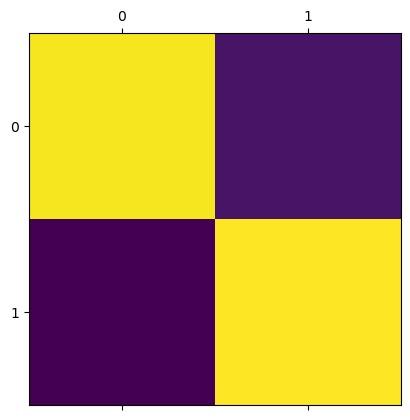

In [123]:
# We can clearly see that the two classes are linearly separable with a line that goes through (30, 1) and (40, 4)
# So we can use this line as a classifier

# if the point is above the line, it is class 0, otherwise it is class 1
def line(x):
    return 0.3 * x - 8  # from https://planetcalc.com/8110/

def threshold(x, y):
    return 0 if y > line(x) else 1

# predict
X_test_black = np.apply_along_axis(count_black_pixels, 1, X_test)
X_test_middle_black = np.apply_along_axis(count_black_pixels_middle, 1,
                                            X_test)

Y_threshold = np.array([threshold(x, y) for x, y in zip(X_test_black, X_test_middle_black)])

# compute metrics
print("metrics for threshold classification")
metrics(y_test, Y_threshold)

